In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,hierarchical
import matplotlib.pyplot as plt

C:\Users\Pavan K M\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data=pd.read_csv("Datasets/crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data=data.drop(columns='Unnamed: 0')
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
kmean=KMeans(n_clusters=4)
kmean.fit(data)

KMeans(n_clusters=4)

In [6]:
kmean.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [7]:
pred=kmean.predict(data)
pred

array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
       2, 0, 0, 2, 2, 0])

In [8]:
data['Clust']=pred
data.head()

,Murder,Assault,UrbanPop,Rape,Clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


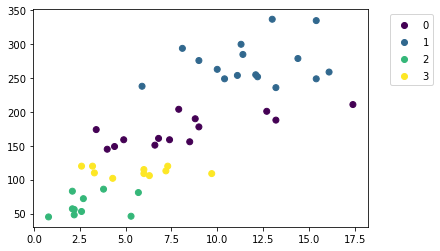

In [9]:
scatter=plt.scatter(data['Murder'],data['Assault'],c=data['Clust']).legend_elements()
plt.legend(*scatter,bbox_to_anchor=(1.21,1))

In [10]:
data[data['Clust']==0]

,Murder,Assault,UrbanPop,Rape,Clust
3,8.8,190,50,19.5,0
5,7.9,204,78,38.7,0
9,17.4,211,60,25.8,0
20,4.4,149,85,16.3,0
24,9.0,178,70,28.2,0
29,7.4,159,89,18.8,0
35,6.6,151,68,20.0,0
36,4.9,159,67,29.3,0
38,3.4,174,87,8.3,0
41,13.2,188,59,26.9,0


In [11]:
data[data['Clust']==1]

,Murder,Assault,UrbanPop,Rape,Clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
4,9.0,276,91,40.6,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
12,10.4,249,83,24.0,1
17,15.4,249,66,22.2,1
19,11.3,300,67,27.8,1
21,12.1,255,74,35.1,1


In [12]:
data[data['Clust']==2]

,Murder,Assault,UrbanPop,Rape,Clust
10,5.3,46,83,20.2,2
14,2.2,56,57,11.3,2
18,2.1,83,51,7.8,2
22,2.7,72,66,14.9,2
28,2.1,57,56,9.5,2
33,0.8,45,44,7.3,2
40,3.8,86,45,12.8,2
44,2.2,48,32,11.2,2
47,5.7,81,39,9.3,2
48,2.6,53,66,10.8,2


In [13]:
data[data['Clust']==3]

,Murder,Assault,UrbanPop,Rape,Clust
6,3.3,110,77,11.1,3
11,2.6,120,54,14.2,3
13,7.2,113,65,21.0,3
15,6.0,115,66,18.0,3
16,9.7,109,52,16.3,3
25,6.0,109,53,16.4,3
26,4.3,102,62,16.5,3
34,7.3,120,75,21.4,3
37,6.3,106,72,14.9,3
43,3.2,120,80,22.9,3


In [22]:
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
Range=range(1,5)
for x in Range:
    kmean=KMeans(n_clusters=x).fit(data)
    kmean.fit(data)
    distortions.append(sum(np.min(cdist(data, kmean.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmean.inertia_)
 
    mapping1[x] = sum(np.min(cdist(data, kmean.cluster_centers_,
                                   'euclidean'), axis=1)) /data.shape[0]
    mapping2[x] = kmean.inertia_

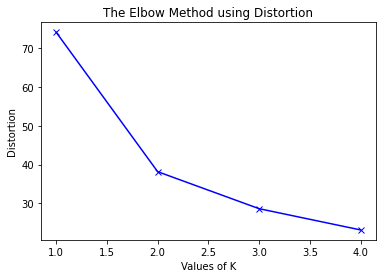

In [23]:
plt.plot(np.array(Range), np.array(distortions), 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

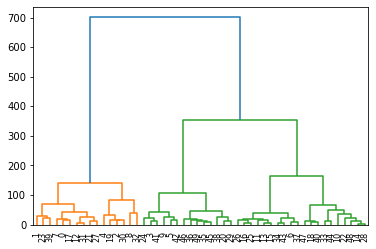

In [24]:
import scipy.cluster.hierarchy as sch 
hclust=sch.dendrogram(sch.linkage(data,method='ward'))